In [13]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()
print(xtrain.shape , ytrain.shape)
print(xtest.shape , ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:
#create the CNN model
cnn_model = keras.models.Sequential()   #empty framework
#convolutional layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
#max pooling - 1
cnn_model.add(keras.layers.MaxPooling2D(2,2))

#convolutional layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
#max pooling - 2
cnn_model.add(keras.layers.MaxPooling2D(2,2))

#feed forward network
cnn_model.add(keras.layers.Flatten()) #input
cnn_model.add(keras.layers.Dense(200,activation='relu')) #HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) #HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) #HL3
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) #Output layer

#optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer= 'sgd',loss= loss ,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 50)        4550      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 50)          0         
 ng2D)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 1250)              0         
                                                                 
 dense_8 (Dense)             (None, 200)              

In [15]:
 #train the cnn along with the validation data
 history = cnn_model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7005 - accuracy: 0.7748 - val_loss: 0.1774 - val_accuracy: 0.9433
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1640 - accuracy: 0.9486 - val_loss: 0.1290 - val_accuracy: 0.9602
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1164 - accuracy: 0.9637 - val_loss: 0.1063 - val_accuracy: 0.9657
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0914 - accuracy: 0.9714 - val_loss: 0.0813 - val_accuracy: 0.9734
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0728 - accuracy: 0.9764 - val_loss: 0.0790 - val_accuracy: 0.9742
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0610 - accuracy: 0.9799 - val_loss: 0.0975 - val_accuracy: 0.9695
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0523 - accuracy: 0.9829 - val_loss: 0.0866 - val_accuracy:

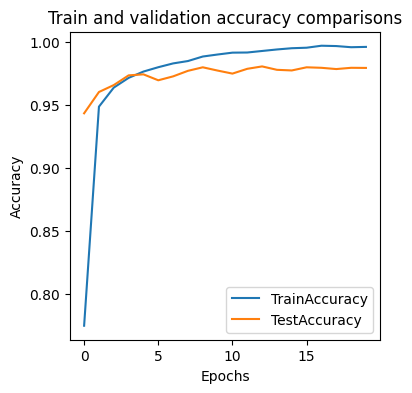

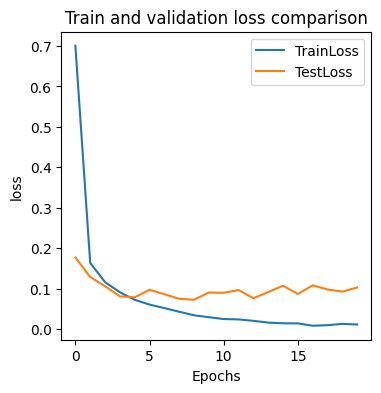

In [16]:
import matplotlib.pyplot as plt

plt.figure(1,(4,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(4,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()